Problem Set 1

In [3]:
# Init
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers
import matplotlib.pyplot as plt

TRAIN_DIR = "/content/drive/MyDrive/ColabNotebooks/dataset/train"
TEST_DIR = "/content/drive/MyDrive/ColabNotebooks/dataset/test"
VAL_DIR = "/content/drive/MyDrive/ColabNotebooks/dataset/val"

BATCH_SIZE = 32
IMAGE_SIZE = (128, 128)

# Create datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

# Model Training
model = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Rescaling(1.0 / 255),
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_ds, validation_data=val_ds, epochs=10)
model.summary()

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Epoch 1/10
163/163 [==============================] - 52s 293ms/step - loss: 0.5825 - accuracy: 0.7429 - val_loss: 0.7608 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 50s 293ms/step - loss: 0.4493 - accuracy: 0.7935 - val_loss: 0.9313 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 54s 313ms/step - loss: 0.1824 - accuracy: 0.9256 - val_loss: 0.5959 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 48s 285ms/step - loss: 0.1636 - accuracy: 0.9340 - val_loss: 1.1399 - val_accuracy: 0.5625
Epoch 5/10
163/163 [==============================] - 49s 285ms/step - loss: 0.1409 - accuracy: 0.9446 - val_loss: 0.4631 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 49s 292ms/step - loss: 0.1194 - accuracy: 0.9574 - val_loss: 0.4557 - val_accuracy: 0.8750
Epoch 7/10

20/20 [==============================] - 4s 131ms/step - loss: 371.3277 - accuracy: 0.6763
Test Accuracy: 67.63%
1/1 [==============================] - 0s 22ms/step


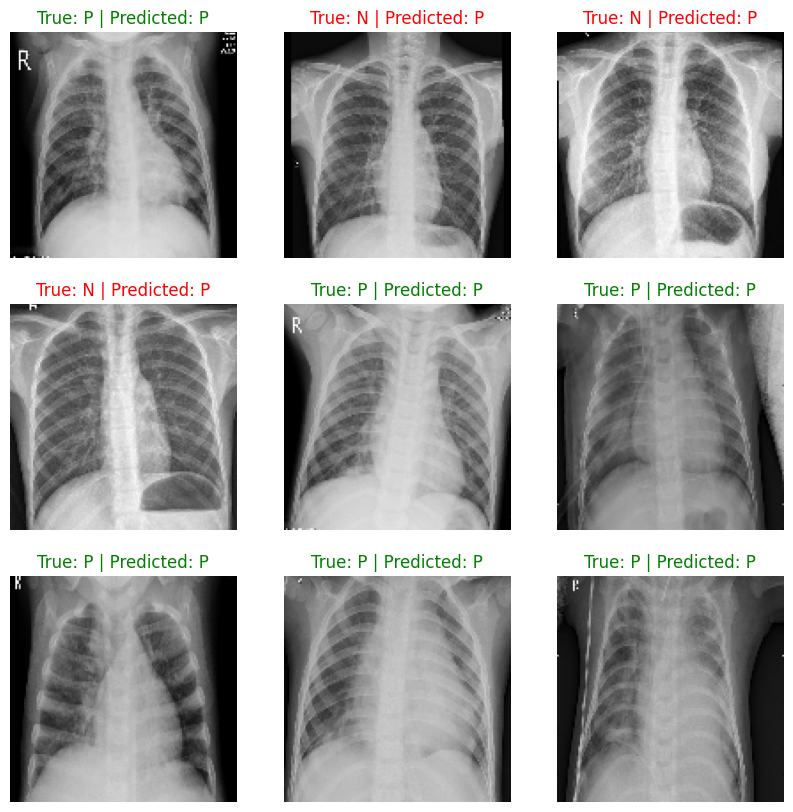

In [4]:
# Visualization and evaluations
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        prediction = model.predict(images)[i]
        predicted_class = "P" if prediction > 0.5 else "N"
        true_label = "P" if labels[i].numpy() == 1 else "N"
        color = 'green' if true_label == predicted_class else 'red'
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f'True: {true_label} | Predicted: {predicted_class}', color=color)
        plt.axis("off")

plt.show()